<a href="https://colab.research.google.com/github/ridwanulhoquejr/The-Spark-Foundation-Internship/blob/main/Predicting_the_Percentage_Score_of_a_Student_based_on_Study_Hours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#The Sparks Foundation GRIP-Data Science and Business Analytics Intern 🤝

---

**Name : Ridwanul Hoque** 👶

### **Task 01: Prediction using Supervised Machine Learning Algorithm** 🔰

---




> **Problem Statement:** Predicting the Percentage Score of a Student based on Study Hours






1.   **Importing the necessary libraries**
2.   **Load The Data**
3.   **Exploratory Data Analysis**
4.   **Split the Dataset**
5.   **Train the Model**
6.   **Evaluate the Model**











In [1]:
# Import the Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression  
from sklearn import metrics

In [2]:
# Load the data

url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Lets check how many dimension do we have

df.shape

(25, 2)

In [4]:
# Have a look on some dataframe insights

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


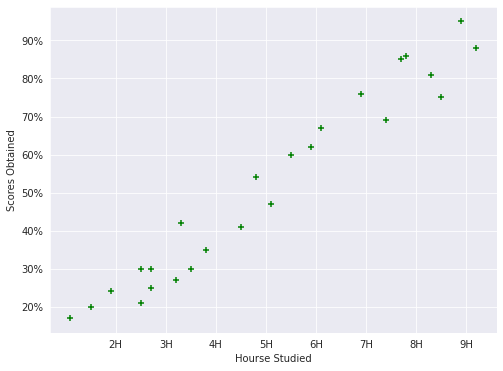

In [5]:
# Plotting our X: Study hours & Y: Markes obtained, and Visualize the relationship between X and Y

plt.figure(figsize=(8,6))
plt.scatter(x=df.Hours, y=df.Scores, c='green', marker='+')
plt.xlabel('Hourse Studied')
plt.ylabel('Scores Obtained')
plt.xticks([2, 3, 4, 5, 6, 7, 8, 9], ['2H', '3H', '4H', '5H', '6H', '7H', '8H', '9H']);
plt.yticks([20, 30, 40, 50, 60, 70, 80, 90], ['20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%']);

In [6]:
# Splitting the DataFrame into X & Y parts

X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values  


In [7]:
 # Splitting data into Train_Test_Split

X_train, X_test, y_train, y_test = train_test_split(
                            X, 
                            Y, 
                            test_size=0.2, 
                            random_state=0, 
                            shuffle=True) 

In [8]:
# Train the Model

regressor = LinearRegression() 
regressor.fit(X_train, y_train) 


LinearRegression()

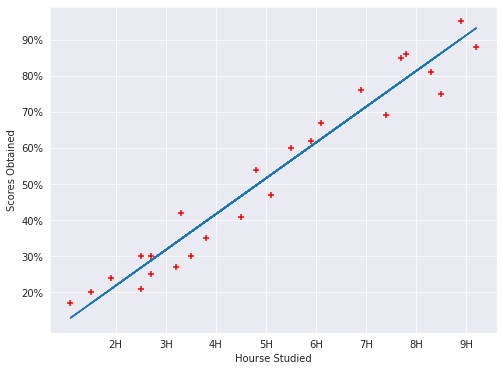

In [9]:
# Plotting the regression line

line = regressor.coef_*X+regressor.intercept_

plt.figure(figsize=(8,6))
plt.xlabel('Hourse Studied')
plt.ylabel('Scores Obtained')
plt.xticks([2, 3, 4, 5, 6, 7, 8, 9], 
           ['2H', '3H', '4H', '5H', '6H', '7H', '8H', '9H']);
plt.yticks([20, 30, 40, 50, 60, 70, 80, 90], 
           ['20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%']);

plt.scatter(X, Y, marker='+', c='red')
plt.plot(X, line);
plt.show()

In [10]:
# Predict with Test Data
# Compare Actual Label and Predicted Label

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 

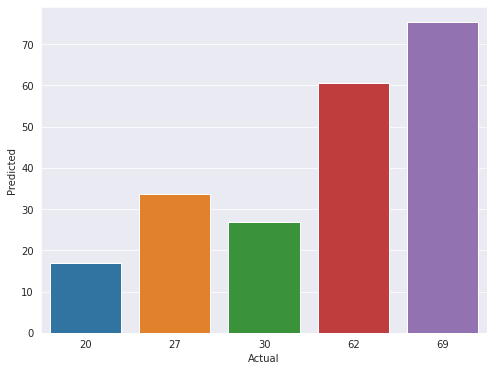

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x='Actual', y='Predicted', data=df);

In [12]:
# Prediction using Real-Data

hours=[10.25]
hours=np.array(hours)
hours=hours.reshape(1,-1)

prediction = regressor.predict(hours)
print(f'Number of hours = {hours[0][0]}')
print(f'Predicted percentage score = {prediction[0]}')

Number of hours = 10.25
Predicted percentage score = 103.60238896801764


In [13]:
# Evaluate the Model

print('Mean absolute error:', metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error: 4.183859899002982


In [14]:
# EValuate model using 10-Fold Cross validation

scores = cross_val_score(regressor, X, Y,
                         scoring="neg_mean_absolute_error",
                         cv=10, n_jobs=1)
mse = (-scores)
print("MSE average: ", np.mean(mse))

MSE average:  5.482931040713107
